---
<h1><B> Fraud Analytics (CS6890)  </h1></B></center>

---

<table>
<tr> 
<td><h3> Assignment : </td>
<td><h3> 5 </td>
</tr>
<tr> 
<td><h3> Title : </td>
<td><h3> Synthetic data generation using Variational Autoencoder </td>
</tr>
<tr> 
<td><h3> Team Details : </td>
<td>

<table>
<tr>
<th> <h3> Name </th>
<th> <h3> Roll Number </th>
</tr>



<tr> 
<td><h5> Preethi G </td>
<td><h5> AI23MTECH14005 </td>
</tr>
<tr> 
<td><h5> Sumukha B G </td>
<td><h5> AI23MTECH14006 </td>
</tr>
<tr> 
<td><h5> Amma Karthikeya </td>
<td><h5> AI23MTECH14001 </td>
</tr>
<tr> 
<td><h5> Jaya Sree </td>
<td><h5> AI23MTECH14007 </td>
</tr>
<tr> 
<td><h5> Adithiyan U </td>
<td><h5> AI23MTECH11001 </td>
</tr>

<table>



</td>
</tr>
<table>

1. Max 5 members for each group.
2. Attached is a Credit card dataset containing credit card transactions.
3. You can use the label encoding for columns (exc. amount).
4. Develop a Vational Autoencoder-based synthetic data generation model, as discussed in the class.
5. Generate 2 Million transactions from the trained model.
6. Evaluate the performance of the model by plotting the distribution of each of the columns (real vs synthetic), and calculating the metrics as discussed in the class.

In [53]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense, Lambda, Layer
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('card_transaction.v1.csv')
df.shape

(2555190, 15)

In [3]:
df

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3.527213e+18,La Verne,CA,91750.0,5300.0,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-7.276121e+17,Monterey Park,CA,91754.0,5411.0,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-7.276121e+17,Monterey Park,CA,91754.0,5411.0,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3.414527e+18,Monterey Park,CA,91754.0,5651.0,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5.817218e+18,La Verne,CA,91750.0,5912.0,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555185,215,0,2006,11,14,07:19,$55.43,Swipe Transaction,4.591017e+18,Whitehouse Station,NJ,8889.0,7349.0,NaN,No
2555186,215,0,2006,11,14,07:52,$7.23,Swipe Transaction,5.205100e+18,North Brunswick,NJ,8902.0,5812.0,NaN,No
2555187,215,0,2006,11,14,08:55,$79.07,Swipe Transaction,8.384250e+17,New York,NY,10001.0,4814.0,NaN,No
2555188,215,0,2006,11,14,11:07,$22.05,Swipe Transaction,5.205100e+18,North Brunswick,NJ,8902.0,5812.0,NaN,No


In [4]:
df.describe()

,User,Card,Year,Month,Day,Merchant Name,Zip,MCC
count,2.555190e+06,2.555190e+06,2.555190e+06,2.555190e+06,2.555190e+06,2.555189e+06,2.216985e+06,2.555189e+06
mean,1.020676e+02,1.238151e+00,2.011793e+03,6.520146e+00,1.571605e+01,-5.783186e+17,5.306903e+04,5.563812e+03
std,6.215434e+01,1.344876e+00,5.150918e+00,3.470954e+00,8.790976e+00,4.731351e+18,2.851758e+04,8.973669e+02
min,0.000000e+00,0.000000e+00,1.995000e+03,1.000000e+00,1.000000e+00,-9.222265e+18,1.001000e+03,1.711000e+03
25%,4.800000e+01,0.000000e+00,2.008000e+03,3.000000e+00,8.000000e+00,-4.693980e+18,3.053500e+04,5.300000e+03
50%,1.010000e+02,1.000000e+00,2.012000e+03,7.000000e+00,1.600000e+01,-9.844448e+17,4.837500e+04,5.499000e+03
75%,1.560000e+02,2.000000e+00,2.016000e+03,1.000000e+01,2.300000e+01,3.102660e+18,7.863300e+04,5.813000e+03
max,2.150000e+02,8.000000e+00,2.020000e+03,1.200000e+01,3.100000e+01,9.222877e+18,9.992800e+04,9.402000e+03


In [5]:
df.isnull().any()

User              False
Card              False
Year              False
Month             False
Day               False
Time              False
Amount             True
Use Chip           True
Merchant Name      True
Merchant City      True
Merchant State     True
Zip                True
MCC                True
Errors?            True
Is Fraud?          True
dtype: bool

In [6]:
df.isnull().sum()

User                    0
Card                    0
Year                    0
Month                   0
Day                     0
Time                    0
Amount                  1
Use Chip                1
Merchant Name           1
Merchant City           1
Merchant State     321041
Zip                338205
MCC                     1
Errors?           2515428
Is Fraud?               1
dtype: int64

__Errors?__ field indicates if any error occured during transaction, and we can conclude NaN values mean no error occured, so we'll replace them with 'No error'. <br>

__Merchant State__ provides info about international transactions which has been proven to be indicator of fraud transactions from previous research. After review of Merchant City column which doesn't provide clear info about international transactions, removing Merchant State column is not a good idea. <br>

NaN values in Merchant state are only for ONLINE transactions as indicated in __Merchant City__ column, we will replace the NaN with 'ONLINE'. <br>

__Zip__ code can be used to geocode Latitude, and Longtitude, which can be used for geographical visualization. Unfortunately geocoding is limited without API key, and permissions, and our dataset is large, this option is not possible. However we can still test this hypothesis with the State names, and countries in __Merchant State__ column. Therefore we will drop the __Zip__ column altogether.


In [7]:
# Drop Null Values
df = df.dropna(subset=['Amount', 'Use Chip', 'Merchant Name', 'Merchant City', 'MCC', 'Is Fraud?', 'Zip'])
df.isnull().any()

User              False
Card              False
Year              False
Month             False
Day               False
Time              False
Amount            False
Use Chip          False
Merchant Name     False
Merchant City     False
Merchant State    False
Zip               False
MCC               False
Errors?            True
Is Fraud?         False
dtype: bool

In [8]:
df['Errors?'].value_counts()

Errors?
Insufficient Balance,                     21466
Bad PIN,                                   5994
Technical Glitch,                          4510
Bad Zipcode,                                187
Insufficient Balance,Technical Glitch,       46
Bad PIN,Insufficient Balance,                44
Bad PIN,Technical Glitch,                    19
Name: count, dtype: int64

In [9]:
df['Errors?']=df['Errors?'].fillna('No Errors')

In [10]:
# The NaN values in Merchant State indicates that the 'Use Chip' was 'Online Transaction' where 'Merchant City' is ONLINE 
df['Merchant State'].unique()

array(['CA', 'NE', 'IL', 'MO', 'IA', 'TX', 'NJ', 'NV', 'NY', 'AZ', 'UT',
       'FL', 'MI', 'WA', 'OH', 'NM', 'SC', 'AK', 'PA', 'VA', 'HI', 'CT',
       'MA', 'MN', 'CO', 'GA', 'AR', 'OR', 'WI', 'NC', 'WV', 'ME', 'NH',
       'VT', 'MD', 'AL', 'KY', 'TN', 'MS', 'KS', 'ND', 'DC', 'MT', 'OK',
       'WY', 'ID', 'RI', 'IN', 'LA', 'DE', 'SD'], dtype=object)

In [11]:
# Creating a boolean mask to filter USA states
usa_states = df['Merchant State'].isin(['OH', 'PA', 'KY', 'NJ', 'CA', 'IL', 'NY', 'MI', 'FL', 'TX',
       'GA', 'CO', 'WI', 'TN', 'VT', 'MD', 'AL', 'IN', 'IA', 'AZ', 'WA',
       'AR', 'NC', 'MA', 'NV', 'MN', 'NE', 'HI', 'SC', 'ID', 'MS', 'KS',
       'LA', 'MO', 'DE', 'VA', 'CT', 'NM', 'OK', 'OR', 'MT',
       'ME', 'NH', 'UT', 'RI', 'WV', 'SD', 'DC', 'ND', 'AK', 'WY', 'AA'])

# Creating a boolean mast to filter countries outside the USA
non_usa = ~usa_states

usa_count = df.loc[usa_states, 'Is Fraud?'].value_counts()
nonusa_count = df.loc[non_usa, 'Is Fraud?'].value_counts()
nonusa_count

Series([], Name: count, dtype: int64)

In [12]:
df['Merchant City'].unique()

array(['La Verne', 'Monterey Park', 'Mira Loma', ..., 'Berkshire',
       'Blodgett Mills', 'Scott Air Force Base'], dtype=object)

In [13]:
df.loc[df['Merchant State'].isnull(), 'Merchant State'] = 'ONLINE'


In [14]:
df.isnull().any()

User              False
Card              False
Year              False
Month             False
Day               False
Time              False
Amount            False
Use Chip          False
Merchant Name     False
Merchant City     False
Merchant State    False
Zip               False
MCC               False
Errors?           False
Is Fraud?         False
dtype: bool

In [15]:
df['Is Fraud?'].value_counts()

Is Fraud?
No     2216462
Yes        523
Name: count, dtype: int64

In [16]:
df.loc[:, 'Is Fraud?'] = df['Is Fraud?'].str.replace('No', '0')
df.loc[:, 'Is Fraud?'] = df['Is Fraud?'].str.replace('Yes', '1')

In [17]:
df['Is Fraud?'] = df['Is Fraud?'].astype(int)

In [18]:
df['Is Fraud?'].value_counts()

Is Fraud?
0    2216462
1        523
Name: count, dtype: int64

In [19]:
df.dtypes

User                int64
Card                int64
Year                int64
Month               int64
Day                 int64
Time               object
Amount             object
Use Chip           object
Merchant Name     float64
Merchant City      object
Merchant State     object
Zip               float64
MCC               float64
Errors?            object
Is Fraud?           int32
dtype: object

__Amount__ is object as it contains $, we'll turn it to numeric.

In [20]:
df['Amount'] = df['Amount'].apply(lambda value: value.split("$")[1])
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

In [21]:
label_encoder = LabelEncoder()
df['Use Chip'] = label_encoder.fit_transform(df['Use Chip']).astype(int)
df['Merchant City'] = label_encoder.fit_transform(df['Merchant City']).astype(int)
df['Merchant State'] = label_encoder.fit_transform(df['Merchant State']).astype(int)
df['Errors?'] = label_encoder.fit_transform(df['Errors?']).astype(int)

In [22]:
df.dtypes

User                int64
Card                int64
Year                int64
Month               int64
Day                 int64
Time               object
Amount            float64
Use Chip            int32
Merchant Name     float64
Merchant City       int32
Merchant State      int32
Zip               float64
MCC               float64
Errors?             int32
Is Fraud?           int32
dtype: object

In [23]:
df = df.drop(['Time'], axis=1)

Scaling

In [24]:
# copy the data
norm_df = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)
norm_df.head()

,User,Card,Year,Month,Day,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0.0,0.0,0.28,0.727273,0.000000,0.086622,1.0,0.691211,0.467562,0.08,0.917333,0.466649,0.857143,0.0
1,0.0,0.0,0.28,0.727273,0.000000,0.073561,1.0,0.460536,0.582470,0.08,0.917373,0.481082,0.857143,0.0
2,0.0,0.0,0.28,0.727273,0.033333,0.084744,1.0,0.460536,0.582470,0.08,0.917373,0.481082,0.857143,0.0
3,0.0,0.0,0.28,0.727273,0.033333,0.085920,1.0,0.685101,0.582470,0.08,0.917373,0.512287,0.857143,0.0
4,0.0,0.0,0.28,0.727273,0.066667,0.082608,1.0,0.815363,0.467562,0.08,0.917333,0.546223,0.857143,0.0


### VAE

In [25]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import layers

tensorflow.config.run_functions_eagerly(True)

print("Num GPUs Available: ", len(tensorflow.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [26]:
img_size_1 = 14
latent_space_dim = 2

# Encoder
x = tensorflow.keras.layers.Input(shape=(img_size_1, 1, 1), name="encoder_input")

encoder_conv_layer1 = tensorflow.keras.layers.Conv2D(filters=1, kernel_size=(3, 3), padding="same", strides=1, name="encoder_conv_1")(x)
encoder_norm_layer1 = tensorflow.keras.layers.BatchNormalization(name="encoder_norm_1")(encoder_conv_layer1)
encoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="encoder_leakyrelu_1")(encoder_norm_layer1)

encoder_conv_layer2 = tensorflow.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", strides=1, name="encoder_conv_2")(encoder_activ_layer1)
encoder_norm_layer2 = tensorflow.keras.layers.BatchNormalization(name="encoder_norm_2")(encoder_conv_layer2)
encoder_activ_layer2 = tensorflow.keras.layers.LeakyReLU(name="encoder_activ_layer_2")(encoder_norm_layer2)

encoder_conv_layer3 = tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", strides=2, name="encoder_conv_3")(encoder_activ_layer2)
encoder_norm_layer3 = tensorflow.keras.layers.BatchNormalization(name="encoder_norm_3")(encoder_conv_layer3)
encoder_activ_layer3 = tensorflow.keras.layers.LeakyReLU(name="encoder_activ_layer_3")(encoder_norm_layer3)

encoder_conv_layer4 = tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", strides=2, name="encoder_conv_4")(encoder_activ_layer3)
encoder_norm_layer4 = tensorflow.keras.layers.BatchNormalization(name="encoder_norm_4")(encoder_conv_layer4)
encoder_activ_layer4 = tensorflow.keras.layers.LeakyReLU(name="encoder_activ_layer_4")(encoder_norm_layer4)

encoder_conv_layer5 = tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", strides=1, name="encoder_conv_5")(encoder_activ_layer4)
encoder_norm_layer5 = tensorflow.keras.layers.BatchNormalization(name="encoder_norm_5")(encoder_conv_layer5)
encoder_activ_layer5 = tensorflow.keras.layers.LeakyReLU(name="encoder_activ_layer_5")(encoder_norm_layer5)

shape_before_flatten = tensorflow.keras.backend.int_shape(encoder_activ_layer5)[1:]
encoder_flatten = tensorflow.keras.layers.Flatten()(encoder_activ_layer5)

encoder_mu = tensorflow.keras.layers.Dense(units=latent_space_dim, name="encoder_mu")(encoder_flatten)
encoder_log_variance = tensorflow.keras.layers.Dense(units=latent_space_dim, name="encoder_log_variance")(encoder_flatten)

encoder_mu_log_variance_model = tensorflow.keras.models.Model(x, (encoder_mu, encoder_log_variance), name="encoder_mu_log_variance_model")

def sampling(mu_log_variance):
    mu, log_variance = mu_log_variance
    epsilon = tensorflow.keras.backend.random_normal(shape=tensorflow.keras.backend.shape(mu), mean=0.0, stddev=1.0)
    random_sample = mu + tensorflow.keras.backend.exp(log_variance/2) * epsilon
    return random_sample

encoder_output = tensorflow.keras.layers.Lambda(sampling, name="encoder_output")([encoder_mu, encoder_log_variance])

encoder = tensorflow.keras.models.Model(x, encoder_output, name="encoder_model")

encoder.summary()

Model: "encoder_model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_input       │ (None, 14, 1, 1)  │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_conv_1      │ (None, 14, 1, 1)  │         10 │ encoder_input[0]… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_norm_1      │ (None, 14, 1, 1)  │          4 │ encoder_conv_1[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_leakyrelu_1 │ (None, 14, 1, 1)  │          0 │ encoder_norm_1[0… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_conv_2      │ (None, 14, 1, 32) │        320 │ encoder_leakyrel… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_norm_2      │ (None, 14, 1, 32) │        128 │ encoder_conv_2[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_activ_laye… │ (None, 14, 1, 32) │          0 │ encoder_norm_2[0… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_conv_3      │ (None, 7, 1, 64)  │     18,496 │ encoder_activ_la… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_norm_3      │ (None, 7, 1, 64)  │        256 │ encoder_conv_3[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_activ_laye… │ (None, 7, 1, 64)  │          0 │ encoder_norm_3[0… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_conv_4      │ (None, 4, 1, 64)  │     36,928 │ encoder_activ_la… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_norm_4      │ (None, 4, 1, 64)  │        256 │ encoder_conv_4[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_activ_laye… │ (None, 4, 1, 64)  │          0 │ encoder_norm_4[0… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_conv_5      │ (None, 4, 1, 64)  │     36,928 │ encoder_activ_la… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_norm_5      │ (None, 4, 1, 64)  │        256 │ encoder_conv_5[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_activ_laye… │ (None, 4, 1, 64)  │          0 │ encoder_norm_5[0… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 256)       │          0 │ encoder_activ_la

 Total params: 94,610 (369.57 KB)

 Trainable params: 94,160 (367.81 KB)

 Non-trainable params: 450 (1.76 KB)

In [27]:
decoder_input = tensorflow.keras.layers.Input(shape=(latent_space_dim,), name="decoder_input")

decoder_dense_layer1 = tensorflow.keras.layers.Dense(units=700, name="decoder_dense_1")(decoder_input)
decoder_reshape = tensorflow.keras.layers.Reshape(target_shape=(14,1,50))(decoder_dense_layer1)

decoder_conv_tran_layer1 = tensorflow.keras.layers.Conv2DTranspose(filters=64, kernel_size=(3, 3), padding="same", strides=1, name="decoder_conv_tran_1")(decoder_reshape)
decoder_norm_layer1 = tensorflow.keras.layers.BatchNormalization(name="decoder_norm_1")(decoder_conv_tran_layer1)
decoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_1")(decoder_norm_layer1)

decoder_conv_tran_layer2 = tensorflow.keras.layers.Conv2DTranspose(filters=64, kernel_size=(3, 3), padding="same", strides=1, name="decoder_conv_tran_2")(decoder_activ_layer1)
decoder_norm_layer2 = tensorflow.keras.layers.BatchNormalization(name="decoder_norm_2")(decoder_conv_tran_layer2)
decoder_activ_layer2 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_2")(decoder_norm_layer2)

decoder_conv_tran_layer3 = tensorflow.keras.layers.Conv2DTranspose(filters=64, kernel_size=(3, 3), padding="same", strides=1, name="decoder_conv_tran_3")(decoder_activ_layer2)
decoder_norm_layer3 = tensorflow.keras.layers.BatchNormalization(name="decoder_norm_3")(decoder_conv_tran_layer3)
decoder_activ_layer3 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_3")(decoder_norm_layer3)

decoder_conv_tran_layer4 = tensorflow.keras.layers.Conv2DTranspose(filters=1, kernel_size=(2, 2), padding="same", strides=1, name="decoder_conv_tran_4")(decoder_activ_layer3)
decoder_output = tensorflow.keras.layers.LeakyReLU(name="decoder_output")(decoder_conv_tran_layer4 )
decode = tensorflow.keras.layers.Reshape(target_shape=(14,1,1))
decoder = tensorflow.keras.models.Model(decoder_input, decoder_output, name="decoder_model")
 
decoder.summary()

Model: "decoder_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_dense_1 (Dense)         │ (None, 700)            │         2,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 14, 1, 50)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_conv_tran_1             │ (None, 14, 1, 64)      │        28,864 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_norm_1                  │ (None, 14, 1, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_leakyrelu_1 (LeakyReLU) │ (None, 14, 1, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_conv_tran_2             │ (None, 14, 1, 64)      │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_norm_2                  │ (None, 14, 1, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_leakyrelu_2 (LeakyReLU) │ (None, 14, 1, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_conv_tran_3             │ (None, 14, 1, 64)      │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_norm_3                  │ (None, 14, 1, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_leakyrelu_3 (LeakyReLU) │ (None, 14, 1, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_conv_tran_4             │ (None, 14, 1, 1)       │           257 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_output (LeakyReLU)      │ (None, 14, 1, 1)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,845 (413.46 KB)

 Trainable params: 105,461 (411.96 KB)

 Non-trainable params: 384 (1.50 KB)

In [28]:
def loss_func(encoder_mu, encoder_log_variance):
    def vae_reconstruction_loss(y_true, y_predict):
        
        reconstruction_loss_factor = 1000
        reconstruction_loss = tensorflow.keras.backend.mean(tensorflow.keras.backend.square(y_true-y_predict), axis=[1, 2, 3])
        return reconstruction_loss_factor * reconstruction_loss

    def vae_kl_loss(encoder_mu, encoder_log_variance):
        kl_loss = -0.5 * tensorflow.keras.backend.sum(1.0 + encoder_log_variance - tensorflow.keras.backend.square(encoder_mu) - tensorflow.keras.backend.exp(encoder_log_variance), axis=1)
        return kl_loss

    def vae_kl_loss_metric(y_true, y_predict):
        kl_loss = -0.5 * tensorflow.keras.backend.sum(1.0 + encoder_log_variance - tensorflow.keras.backend.square(encoder_mu) - tensorflow.keras.backend.exp(encoder_log_variance), axis=1)
        return kl_loss

    def vae_loss(y_true, y_predict):
        reconstruction_loss = vae_reconstruction_loss(y_true, y_predict)
        kl_loss = vae_kl_loss(y_true, y_predict)

        loss = reconstruction_loss + kl_loss
        return loss

    return vae_loss

In [29]:
vae_input = tensorflow.keras.layers.Input(shape=(img_size_1, 1, 1), name="VAE_input")
vae_encoder_output = encoder(vae_input)
vae_decoder_output = decoder(vae_encoder_output)
vae = tensorflow.keras.models.Model(vae_input, vae_decoder_output, name="VAE")
vae.summary()

Model: "VAE"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ VAE_input (InputLayer)          │ (None, 14, 1, 1)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_model (Functional)      │ (None, 2)              │        94,610 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_model (Functional)      │ (None, 14, 1, 1)       │       105,845 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 200,455 (783.03 KB)

 Trainable params: 199,621 (779.77 KB)

 Non-trainable params: 834 (3.26 KB)

In [30]:
vae.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.0005), loss=loss_func(encoder_mu, encoder_log_variance))

In [31]:
norm_df.shape

(2216985, 14)

In [32]:
norm_df.iloc[0].index.to_list()

['User',
 'Card',
 'Year',
 'Month',
 'Day',
 'Amount',
 'Use Chip',
 'Merchant Name',
 'Merchant City',
 'Merchant State',
 'Zip',
 'MCC',
 'Errors?',
 'Is Fraud?']

In [33]:
col_index  = {i:j for i, j in enumerate(norm_df.iloc[0].index.to_list())}
col_index

{0: 'User',
 1: 'Card',
 2: 'Year',
 3: 'Month',
 4: 'Day',
 5: 'Amount',
 6: 'Use Chip',
 7: 'Merchant Name',
 8: 'Merchant City',
 9: 'Merchant State',
 10: 'Zip',
 11: 'MCC',
 12: 'Errors?',
 13: 'Is Fraud?'}

In [34]:
reshaped_array = np.array(norm_df).reshape(-1, 14, 1, 1)
reshaped_array.shape

(2216985, 14, 1, 1)

In [35]:
with tensorflow.device('/GPU:0'):
    vae.fit(reshaped_array, reshaped_array, epochs=20, batch_size=512, shuffle=True)

Epoch 1/20
4331/4331 ━━━━━━━━━━━━━━━━━━━━ 594s 137ms/step - loss: 34.4580
Epoch 2/20
4331/4331 ━━━━━━━━━━━━━━━━━━━━ 740s 171ms/step - loss: 22.2010
Epoch 3/20
4331/4331 ━━━━━━━━━━━━━━━━━━━━ 687s 158ms/step - loss: 20.1037
Epoch 4/20
4331/4331 ━━━━━━━━━━━━━━━━━━━━ 641s 148ms/step - loss: 19.0525
Epoch 5/20
4331/4331 ━━━━━━━━━━━━━━━━━━━━ 628s 145ms/step - loss: 18.4047
Epoch 6/20
4331/4331 ━━━━━━━━━━━━━━━━━━━━ 656s 151ms/step - loss: 17.9071
Epoch 7/20
4331/4331 ━━━━━━━━━━━━━━━━━━━━ 723s 167ms/step - loss: 17.3397
Epoch 8/20
4331/4331 ━━━━━━━━━━━━━━━━━━━━ 799s 185ms/step - loss: 16.8836
Epoch 9/20
4331/4331 ━━━━━━━━━━━━━━━━━━━━ 712s 164ms/step - loss: 16.5114
Epoch 10/20
4331/4331 ━━━━━━━━━━━━━━━━━━━━ 833s 192ms/step - loss: 16.2877
Epoch 11/20
4331/4331 ━━━━━━━━━━━━━━━━━━━━ 902s 208ms/step - loss: 15.9721
Epoch 12/20
4331/4331 ━━━━━━━━━━━━━━━━━━━━ 931s 215ms/step - loss: 15.8124
Epoch 13/20
4331/4331 ━━━━━━━━━━━━━━━━━━━━ 811s 187ms/step - loss: 15.5734
Epoch 14/20
4331/4331 ━━━━━━━━━━━━

In [38]:
vae.save('vae_model.keras')

In [48]:
vae.save_weights('vae.weights.h5')

In [49]:
from tqdm import tqdm

scale = 1.0
n = 1415
grid_x = np.linspace(-scale, scale, n)
grid_y = np.linspace(-scale, scale, n)

synthetic_data = []
for i, yi in enumerate(tqdm(grid_y)):
    for j, xi in enumerate(grid_x):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample, verbose=0)
        synthetic_data.append(x_decoded[0])

100%|██████████| 1415/1415 [25:24:45<00:00, 64.65s/it]  


In [50]:
syn_data = np.array(synthetic_data).reshape(-1, 14)
synth_data = pd.DataFrame(syn_data, columns=col_index.values())

In [51]:
synth_data

,User,Card,Year,Month,Day,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0.929236,0.150969,0.710514,0.358382,0.768793,0.049278,1.007522,0.616607,0.044535,0.711538,0.262331,0.498878,0.836969,0.000053
1,0.929383,0.151045,0.711271,0.357293,0.768487,0.049402,1.007517,0.615575,0.044532,0.711140,0.261900,0.498912,0.836998,0.000057
2,0.929528,0.151120,0.712028,0.356204,0.768181,0.049526,1.007515,0.614544,0.044527,0.710742,0.261467,0.498946,0.837027,0.000061
3,0.929675,0.151195,0.712785,0.355116,0.767875,0.049650,1.007511,0.613512,0.044523,0.710343,0.261034,0.498980,0.837056,0.000065
4,0.929822,0.151270,0.713541,0.354028,0.767570,0.049775,1.007507,0.612480,0.044520,0.709945,0.260600,0.499015,0.837085,0.000070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002220,0.610881,0.217618,0.439049,0.255480,0.727068,0.060607,1.000448,0.543507,0.256464,0.062332,0.902550,0.494334,0.859183,0.005076
2002221,0.611919,0.217741,0.439373,0.256016,0.727152,0.060581,1.000421,0.545624,0.256238,0.062385,0.902642,0.494204,0.859227,0.005054
2002222,0.612957,0.217864,0.439698,0.256554,0.727237,0.060555,1.000394,0.547742,0.256012,0.062439,0.902735,0.494076,0.859270,0.005031
2002223,0.613996,0.217988,0.440022,0.257092,0.727321,0.060529,1.000366,0.549860,0.255788,0.062492,0.902828,0.493947,0.859314,0.005010


In [52]:
synth_data.to_csv('synth_data_2million.csv', index=False)

In [61]:
# Step 1: Inverse transform the synthetic data
inv_synth_df = pd.DataFrame(MinMaxScaler().fit(df).inverse_transform(synth_data), columns=synth_data.columns)
inv_norm_df = pd.DataFrame(MinMaxScaler().fit(df).inverse_transform(norm_df), columns=norm_df.columns)

# Modify Scale
inv_norm_stats = inv_norm_df.describe() 
inv_synth_stats = inv_synth_df.describe()
print(inv_norm_stats)
print(inv_synth_stats)

inv_synth_df['User'] = inv_synth_df['User'].round(0).astype(int)
inv_synth_df['Card'] = inv_synth_df['Card'].round(0).astype(int)
inv_synth_df['Year'] = inv_synth_df['Year'].round(0).astype(int)
inv_synth_df['Month'] = inv_synth_df['Month'].round(0).astype(int)
inv_synth_df['Day'] = inv_synth_df['Day'].round(0).astype(int)
inv_synth_df['Merchant City'] = inv_synth_df['Merchant City'].round(0).astype(int)
inv_synth_df['Merchant State'] = inv_synth_df['Merchant State'].round(0).astype(int)
inv_synth_df['Zip'] = inv_synth_df['Zip'].round(0).astype(int)
inv_synth_df['Errors?'] = inv_synth_df['Errors?'].round(0).astype(int)
inv_synth_df['Amount'] = inv_synth_df['Amount'] * -1
inv_synth_df['Amount'] = inv_synth_df['Amount'].round(2).astype(int)
inv_synth_df['Use Chip'] = inv_synth_df['Use Chip'].apply(lambda x: 1 if x > 0.5 else 0).astype(int)
inv_synth_df['Is Fraud?'] = inv_synth_df['Is Fraud?'].round(0).astype(int)
inv_synth_df['MCC'] = inv_synth_df['MCC'].round(0)
inv_synth_df['Merchant Name'] = inv_synth_df['Merchant Name'].round(2)


# Coarse-grained metrics - Duplicates count
total_data = pd.concat([inv_norm_df, inv_synth_df], axis=0)
dup_total = total_data.duplicated().sum()
dup_real = inv_norm_df.duplicated().sum()
dup_synth = inv_synth_df.duplicated().sum()
copies = dup_total - dup_real - dup_synth

print(f'Total duplicates: {dup_total}')
print(f'Real duplicates: {dup_real}')
print(f'Synthetic duplicates: {dup_synth}')
print(f'Copies: {copies}')

               User          Card          Year         Month           Day  \
count  2.216985e+06  2.216985e+06  2.216985e+06  2.216985e+06  2.216985e+06   
mean   1.030859e+02  1.261865e+00  2.011696e+03  6.525046e+00  1.571286e+01   
std    6.183278e+01  1.352907e+00  5.191002e+00  3.473211e+00  8.787035e+00   
min    0.000000e+00  0.000000e+00  1.995000e+03  1.000000e+00  1.000000e+00   
25%    4.800000e+01  0.000000e+00  2.008000e+03  3.000000e+00  8.000000e+00   
50%    1.020000e+02  1.000000e+00  2.012000e+03  7.000000e+00  1.600000e+01   
75%    1.560000e+02  2.000000e+00  2.016000e+03  1.000000e+01  2.300000e+01   
max    2.150000e+02  8.000000e+00  2.020000e+03  1.200000e+01  3.100000e+01   

             Amount      Use Chip  Merchant Name  Merchant City  \
count  2.216985e+06  2.216985e+06   2.216985e+06   2.216985e+06   
mean   4.288970e+01  7.158551e-01  -4.274786e+17   3.875653e+03   
std    8.205087e+01  4.510063e-01   4.774326e+18   2.266638e+03   
min   -5.000000e+02 

As indicated above the coarse grained metrics the total duplicates were 3639 and the duplicates in Real data was also 3639 and the number of copies is 0 which implies that the number of duplicates in synthetic data is 0.

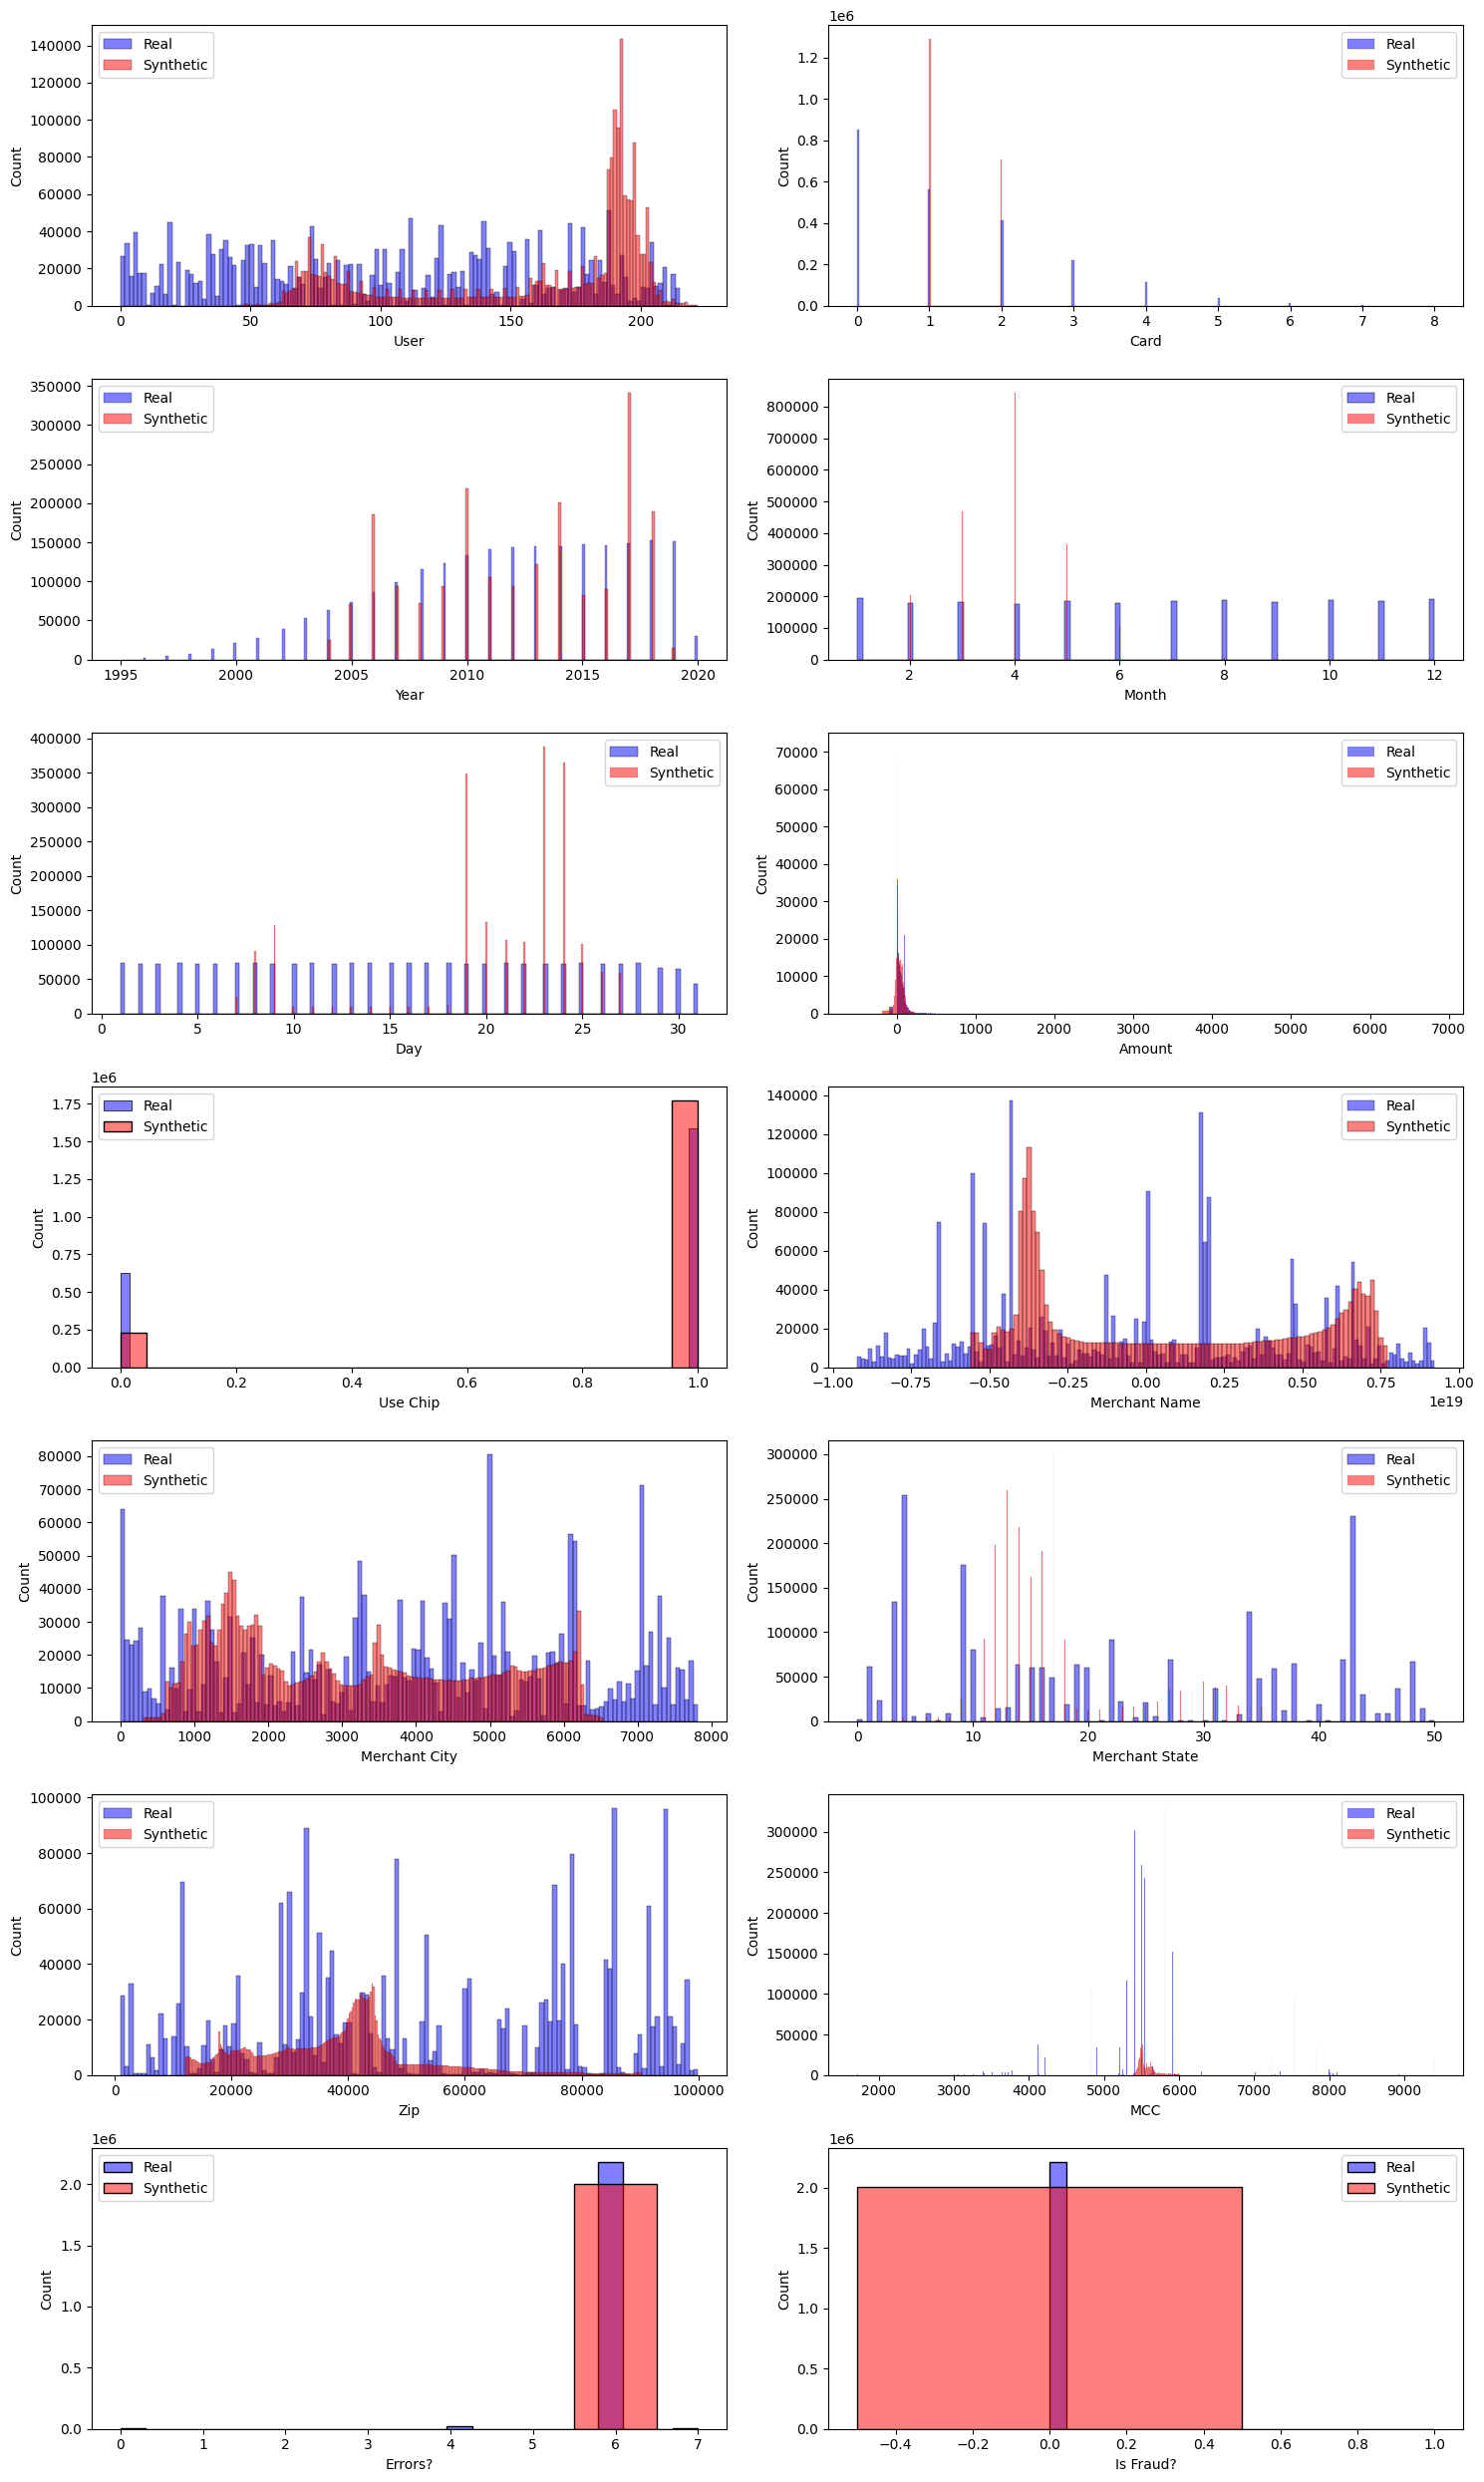

In [63]:
# Medium-grained metrics - Plotting distributions
num_cols = inv_norm_df.columns
num_plots = len(num_cols)
num_rows = int(np.ceil(num_plots / 2))

plt.figure(figsize=(15, 25))

for i, col in enumerate(num_cols):
    plt.subplot(num_rows, 2, i + 1)
    sns.histplot(inv_norm_df[col], color='blue', label='Real', alpha=0.5)
    sns.histplot(inv_synth_df[col], color='red', label='Synthetic', alpha=0.5)
    plt.legend()
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In the Medium-grained metrics we evaluate the performance of the model by plotting the distribution of each of the columns (real vs synthetic)

In [64]:
# Fine-grained metrics - Compare joint distributions -- rmse
rmse = []
for col in num_cols:
    rmse.append(np.sqrt(np.mean((inv_norm_df[col] - inv_synth_df[col]) ** 2)))

rmse_df = pd.DataFrame(rmse, index=num_cols, columns=['RMSE'])
rmse_df

,RMSE
User,1.131726e+02
Card,1.439178e+00
Year,6.744584e+00
Month,4.502618e+00
Day,1.117394e+01
Amount,1.011679e+02
Use Chip,5.720616e-01
Merchant Name,6.595451e+18
Merchant City,2.924952e+03
Merchant State,1.760097e+01


Finally we have compared the joint distribution of the real and synthetic data by calculating the RMSE values for each column.

In summary, our data processing pipeline involved several key steps to prepare the data, train a Variational Autoencoder (VAE), generate synthetic data, and evaluate its quality.

Firstly, we began by cleaning the raw data and preprocessing its columns. This included handling missing values by filling them with logical assumptions and encoding categorical variables using label encoding. Cleaning and preprocessing are essential to ensure the data is in a suitable format for modeling.

Next, we applied scaling to the preprocessed data using the Min-Max scaler. Scaling is crucial for algorithms like neural networks to ensure that all features contribute equally to the model's performance. Min-Max scaling scales the data to a fixed range, typically between 0 and 1, preserving the relationships between variables.

Then, we introduced the Variational Autoencoder (VAE) model. VAE is a type of generative model that learns to encode and decode data. It's particularly effective for generating new samples that resemble the original data distribution. The VAE model was trained for 20 epochs, during which it learned to reconstruct the input data and capture its underlying distribution.

The VAE model uses a combination of two loss functions: reconstruction loss and KL divergence. The reconstruction loss measures how well the model reconstructs the input data, while the KL divergence ensures that the learned latent space follows a known distribution, typically a Gaussian.

During training, the VAE model learns the parameters of this Gaussian distribution, specifically the mean (mu) and standard deviation (sigma). These parameters are then used to sample points in the latent space, which are subsequently passed to the decoder block.

Using these sampled latent points, we generated synthetic data. In our case, we generated 2,002,225 synthetic data points. These synthetic data points represent new instances that resemble the original data distribution.

Finally, we evaluated the quality of the generated data using three metrics: Coarse-grained, Medium-grained, and Fine-grained evaluation. These metrics provide insights into how well the synthetic data captures the characteristics of the original data across different levels of granularity.

However, our evaluation revealed that the generated data was slightly skewed from the original data distribution. This suggests that while the VAE model successfully learned the underlying patterns in the data, there may be room for improvement in the generation process to better match the original data distribution. Further refinement of the model architecture or tuning of hyperparameters may be necessary to achieve better results.